# The Harmonic Oscillator system

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from scipy import special
from scipy.integrate import solve_ivp
from scipy.integrate import quad

In [2]:
# Define the function to deliver the r.h.s. of the system
def f(t,r):
    x,y=r
    dxdt=y
    dydt=-x-0.1*y
    return dxdt,dydt

In [3]:
# Integrate dy/dt=f(t,y)
r0=[1.,0.]
t0=0.
t1=10.
dt=0.00001
rtol=1.e-12
atol=1.e-18
teval=np.linspace(t0,t1,int((t1-t0)/dt+1))
sol=solve_ivp(f, [t0, t1], r0,method='DOP853',t_eval=teval,rtol=rtol,atol=atol)
x=sol.y[0]
v=sol.y[1]
t=sol.t
XV=[x,v]
# Calculate the time derivatives of x and v
xdot=np.gradient(x,dt,edge_order=2)
vdot=np.gradient(v,dt,edge_order=2)

<IPython.core.display.Javascript object>


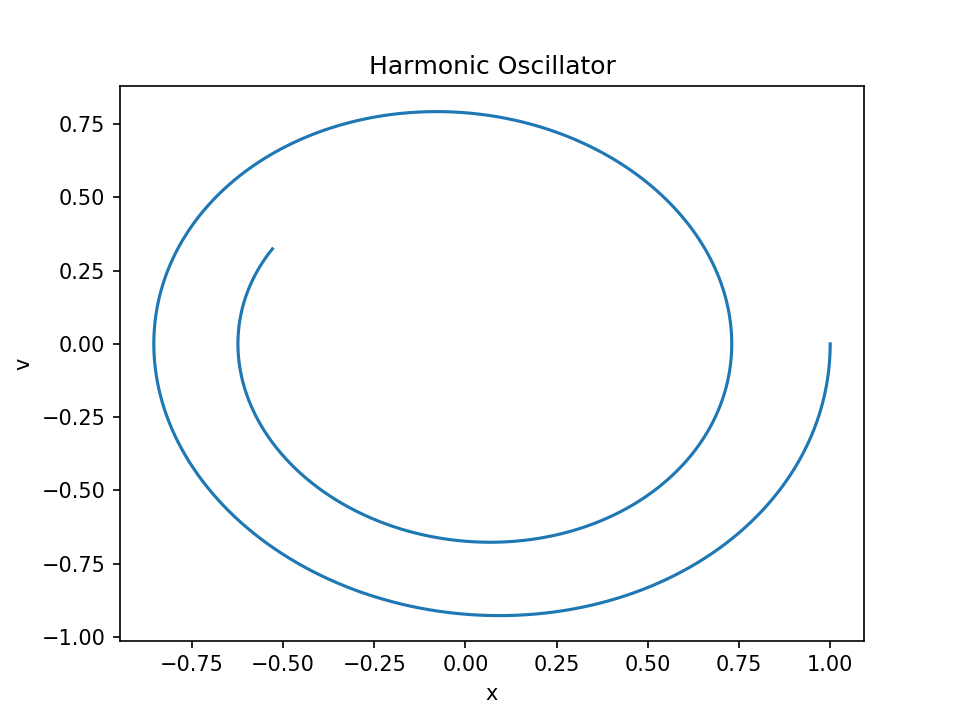

In [4]:
%matplotlib notebook
# plot the solutions curves (x,v)
plt.title('Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(x,v)
plt.savefig('HOorig.png')
#plt.plot(x)
#plt.plot(v)

# Now we check how good is the reprodction by solving the 

# Tadaaah, wen wundert's, dass rauskommt, was man reinsteckt, hehehehe

In [ ]:
def DVecCMat(ydot,XV,n):
    x,v=XV
    laver=len(x)
    l=(n+1)*(n+2)//2
    cijn=np.append(np.array(np.where(np.less_equal(*np.mgrid[-n-1:0,-1:-n-2:-1]))),np.arange(l)).reshape(3,l).T
    dim=len(cijn)
    c=np.zeros((dim,dim),dtype=float)
    d=np.zeros(dim,dtype=float)
    for i,j,r in cijn:
        d[r]=np.sum(ydot*x**i*v**j)/laver
        for k,l,s in cijn:
            c[r,s]=np.sum(x**i*v**j*x**k*v**l)/laver
    return d,c
#
def ffit(t,r,*argv):
    x,v=r
    #return np.asarray(argv[0])
    #axdot,avdot=np.asarray(argv[0])
    axdot,avdot=argv
    l=len(axdot)
    n=int((-3+np.sqrt(1+8*l))//2)
    c=np.zeros((n+1,n+1),dtype=float)
    cbool=np.less_equal(*np.mgrid[-n-1:0,-1:-n-2:-1])
    c[cbool]=axdot
    dxdt=poly.polyval2d(x,v,c)
    l=len(avdot)
    n=int((-3+np.sqrt(1+8*l))//2)
    c=np.zeros((n+1,n+1),dtype=float)
    cbool=np.less_equal(*np.mgrid[-n-1:0,-1:-n-2:-1])
    c[cbool]=avdot
    dvdt=poly.polyval2d(x,v,c)
    return dxdt,dvdt

In [ ]:
# The order of the polynomial the r.h.s. to fit to
norder=2
# Calculate the coefficients for the r.h.s. of vdot
d,c=DVecCMat(xdot,XV,norder)
#print(np.einsum('ij,j->i',np.linalg.inv(c),d)[[1,4,7]],'\n',axdot[[1,4,7]])
#axdot=np.einsum('ij,j->i',np.linalg.inv(c),d)
# Calculate the coefficients for the r.h.s. of vdot
d,c=DVecCMat(vdot,XV,norder)
#print(np.einsum('ij,j->i',np.linalg.inv(c),d)[[1,4,7]],'\n',avdot[[1,4,7]])
#avdot=np.einsum('ij,j->i',np.linalg.inv(c),d)

In [ ]:
rtol=1.e-12
atol=1.e-24
solfit=solve_ivp(ffit, [t0, t1], r0,method='DOP853',t_eval=teval,rtol=rtol,atol=atol,args=(axdot,avdot))

In [ ]:
%matplotlib notebook
# plot the solutions curves (x,v)
xfit=solfit.y[0]
vfit=solfit.y[1]
plt.title('Fitted Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(xfit,vfit)
plt.savefig('HOfitn2.png')
#plt.plot(v)

In [ ]:
axdot

In [ ]:
avdot

In [ ]:
d,c=DVecCMat(vdot,XV,2)
#print(np.einsum('ij,j->i',np.linalg.inv(c),d)[[1,4,7]],'\n',avdot[[1,4,7]])
np.einsum('ij,j->i',np.linalg.inv(c),d)

In [ ]:
cinv=np.linalg.inv(c)

In [ ]:
cinv-cinv.T

In [ ]:
np.linalg.det(c)

In [ ]:
np.max(xdot**2+vdot**2)

In [ ]:
np.min(x**2+v**2)

In [ ]:
xdot2=(np.roll(x,-1)-np.roll(x,1))/2./dt
xdot2[0]=0.5*(-3.*x[0]+4.*x[1]-x[2])/dt
xdot2[-1]=0.5*(3.*x[-1]-4.*x[-2]+x[-3])/dt
vdot2=(np.roll(x,-1)-np.roll(x,1))/2./dt
vdot2[0]=0.5*(-3.*x[0]+4.*x[1]-x[2])/dt
vdot2[-1]=0.5*(3.*x[-1]-4.*x[-2]+x[-3])/dt

In [ ]:
xdot2

In [ ]:
xdot

In [ ]:
np.min(solfit.y[0])

In [ ]:
d

In [ ]:
fint=lambda t: np.sin(t)*np.cos(t)**2
quad(fint,0.,10.)

In [ ]:
t

In [ ]:
t0=0.
t1=10.
dt=0.001
teval=np.linspace(t0,t1,int((t1-t0)/dt+1))
x=np.cos(teval)
v=np.sin(teval)
XV=[x,v]
xdot=np.gradient(x,dt,edge_order=2)
vdot=np.gradient(v,dt,edge_order=2)
# The order of the polynomial the r.h.s. to fit to
norder=1
# Calculate the coefficients for the r.h.s. of vdot
d,c=DVecCMat(xdot,XV,norder)
#print(np.einsum('ij,j->i',np.linalg.inv(c),d)[[1,4,7]],'\n',axdot[[1,4,7]])
axdot=np.einsum('ij,j->i',np.linalg.inv(c),d)
# Calculate the coefficients for the r.h.s. of vdot
d,c=DVecCMat(vdot,XV,norder)
#print(np.einsum('ij,j->i',np.linalg.inv(c),d)[[1,4,7]],'\n',avdot[[1,4,7]])
avdot=np.einsum('ij,j->i',np.linalg.inv(c),d)

In [ ]:
print(axdot,'\n',avdot)

In [ ]:
np.linalg.det(c)